# Customer Segmentation and Churn Prediction in Online Retail based on customer behaviour and characteristics.

This dataset contains information about retail transactions, including details such as InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country.

Here are some common tasks we are going to perform with this dataset:

Exploratory Data Analysis (EDA):

Check for missing data.
Explore the distribution of quantities and prices.
Analyze sales trends over time (e.g., daily, monthly, or yearly).
Investigate the distribution of customers by country.


Customer Segmentation:

Segment customers based on their purchase behavior.
Calculate customer metrics like recency, frequency, and monetary value (RFM analysis).


Product Analysis:

Identify the best-selling products.
Calculate product metrics like total revenue and quantity sold.
Analyze product trends over time.


Geographic Analysis:

Examine sales distribution by country.
Analyze differences in customer behavior between countries.


Time-Series Analysis:

Use time-series analysis to forecast future sales.
Identify seasonality and trends in the data.


Data Preprocessing:

Clean and pre-process the data, e.g., handle missing values, remove duplicates, and format dates.
Convert categorical variables into numerical representations if needed.


Market Basket Analysis:

Discover associations between products purchased together (e.g., using Apriori algorithm).


Anomaly Detection:

Detect unusual or fraudulent transactions.


Customer Churn Analysis:

Identify customers who have not made purchases recently.


Visualization:

Create various visualizations (e.g., bar charts, line charts, heatmaps) to better understand the data and present insights.


Statistical Analysis:

Perform statistical tests and hypothesis testing to answer specific questions.


Predictive Modeling:

Build predictive models to forecast future sales, customer behavior, or other relevant outcomes.

# 1. Exploratory Data Analysis (EDA)

Check for missing data.

Explore the distribution of quantities and prices.

Analyze sales trends over time (e.g., daily, monthly, or yearly).

Investigate the distribution of customers by country.

In [8]:
# import the necessary libraries

import pandas as pd

# Load the dataset

df = pd.read_excel('Online Retail.xlsx')

# Display the first few rows of the dataset

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
# Check column names and data types

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


It contains 541,909 rows and 8 columns.

Each column has a name and shows the data type of its elements.

The "InvoiceDate" column has the datetime data type.

The "Quantity" and "UnitPrice" columns have numeric data types.

The "CustomerID" column appears to have missing values (NaN).

In [10]:
# Check for missing values

print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Impute with "Unknown": 

Replace the missing descriptions with a placeholder value like "Unknown." 

This is a common practice when you don't have access to the actual descriptions for some items.

In [11]:
# Handling missing values

df['Description'].fillna('Unknown', inplace=True)

Impute with Placeholder: 

We need to keep these rows but lack customer information, 

we can replace missing "CustomerID" values with a placeholder value, 

such as -1 or 0, to indicate non-registered or anonymous customers.

In [12]:
df['CustomerID'].fillna(-1, inplace=True)

In [16]:
# Check for missing values

print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [14]:
# Check for missing values in all columns

missing_values = df.isnull().sum()

In [15]:
# Ensure that you used the correct placeholder values for 'Description' and 'CustomerID'

# For 'Description'

df['Description'].fillna('Unknown', inplace=True)

# For 'CustomerID'

df['CustomerID'].fillna(-1, inplace=True)

# Check for missing values again to verify that all missing values have been addressed

missing_values = df.isnull().sum()

In [19]:
# Summary statistics for numerical columns

print(df.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  541909.000000  
mean    11476.725404  
min        -1.000000  
25%     12352.000000  
50%     14382.000000  
75%     16255.000000  
max     18287.000000  
std      6778.330409  



The output you've provided is the result of calling the describe() method on your DataFrame, and it displays summary statistics for the numeric columns in your dataset:

Quantity:

Count: 541,909
Mean: 9.55
Minimum: -80,995
25th Percentile: 1.00
Median (50th Percentile): 3.00
75th Percentile: 10.00
Maximum: 80,995
Standard Deviation: 218.08


UnitPrice:

Count: 541,909
Mean: 4.61
Minimum: -11,062.06
25th Percentile: 1.25
Median (50th Percentile): 2.08
75th Percentile: 4.13
Maximum: 38,970.00
Standard Deviation: 96.76


CustomerID:

Count: 541,909
Mean: 11,476.73
Minimum: -1 (It appears that the placeholder value was used for missing customer IDs)
25th Percentile: 12,352.00
Median (50th Percentile): 14,382.00
75th Percentile: 16,255.00
Maximum: 18,287.00
Standard Deviation: 6,778.33


These statistics provide an overview of the distribution of values in numeric columns. For example, you can see the mean, minimum, maximum, and quartile values for each column. Keep in mind that the "Quantity" and "UnitPrice" columns contain some extreme values, such as negative quantities and very high prices, which may require further investigation depending on the context of your analysis. Additionally, the use of -1 as a placeholder for missing "CustomerID" values is apparent from the statistics.

# 2. Customer Segmentation

Segment customers based on their purchase behavior.

Calculate customer metrics like recency, frequency, and monetary value (RFM analysis).

In [20]:
# import necessary libraries

import datetime as dt

# Convert 'InvoiceDate' column to datetime

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Recency, Frequency and Monetary Value Analysis (RFM)

RFM metrics, which stand for Recency, Frequency, and Monetary Value, are calculated in customer segmentation and analysis for several important reasons:

Customer Segmentation: 

RFM analysis helps in segmenting customers into different groups based on their behavior, making it easier for businesses to tailor their marketing and communication strategies to each segment's unique characteristics and needs.

Targeted Marketing: 

By understanding the RFM segments, businesses can create targeted marketing campaigns. For example, they can send promotions to high-value customers, re-engage customers who haven't made a purchase recently, or encourage frequent shoppers to make more purchases.

Customer Retention: 

RFM analysis can identify high-value customers who are at risk of churning (i.e., no longer making purchases). Businesses can take proactive measures to retain these valuable customers, such as offering personalized incentives or better customer service.

Resource Allocation: 

It helps allocate resources more efficiently. For instance, businesses can focus their advertising budget on customers who are likely to respond positively, reducing marketing costs and improving ROI.

Product Recommendations: 

RFM analysis can inform product recommendations. For example, if a customer frequently buys office supplies, a business might recommend complementary items like pens or paper.

Inventory Management: Understanding purchase frequency can help businesses manage their inventory effectively. For instance, if certain products are frequently purchased, businesses can ensure they have enough stock on hand.

Customer Lifetime Value (CLV): 

RFM analysis can be used to calculate CLV, which estimates the total revenue a customer is likely to generate over their entire relationship with the company. This information is crucial for making strategic decisions about customer acquisition and retention.

Competitive Advantage: 

Companies that use RFM analysis effectively can gain a competitive advantage by offering more personalized and relevant experiences to their customers compared to competitors who do not leverage this data.

In [21]:
# Calculate RFM metrics

current_date = max(data['InvoiceDate'])  # Current date
rfm_df = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'UnitPrice': 'sum'  # Monetary value
})

# Rename columns for clarity

rfm_df.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'UnitPrice': 'Monetary'
}, inplace=True)

# Print the first few rows of the RFM DataFrame

print(rfm_df.head())

            Recency  Frequency  Monetary
CustomerID                              
12346.0         325          2      2.08
12347.0           1          7    481.21
12348.0          74          4    178.71
12349.0          18          1    605.10
12350.0         309          1     65.30


Recency: This represents how recently a customer made a purchase. For example, customer 12346.0 made their last purchase 325 days ago, while customer 12347.0 made their last purchase just 1 day ago.


Frequency: This indicates how often a customer makes a purchase. Customer 12347.0 has made 7 purchases, which is quite frequent compared to the others in this data set.


Monetary: This represents the monetary value of a customer's purchases. Customer 12347.0 has spent a total of 481.21 currency units, making them a high-value customer in this sample.

These RFM metrics provide a snapshot of our customers' behavior, but to leverage this data effectively, we may want to segment our customers into different groups based on these metrics. Here's a simple example of how we might do this:

High-Value Customers: These are customers with a high monetary value (e.g., 12347.0), indicating they spend a lot.

Frequent Customers: These are customers with a high frequency of purchases (e.g., 12347.0), indicating they buy from you often.

Recent Customers: These are customers with a low recency value (e.g., 12347.0), indicating they've made a purchase recently.

Loyal but Lower-Spending Customers: Customers with moderate frequency and monetary values (e.g., 12348.0) may be considered loyal but not high spenders.

Churning or Inactive Customers: Customers with high recency values (e.g., 12346.0, 12350.0) and low frequency/monetary values may be at risk of churning or need re-engagement strategies.

These are just some basic segments, and we can further refine them based on our business goals and objectives. Once we've segmented our customers, we can tailor our marketing and retention strategies to address the specific needs of each group.

# Customer Segmentation

We are going to apply clustering techniques (e.g., K-means clustering) to segment customers based on these metrics. 

C:\Users\ManuhIsMe\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


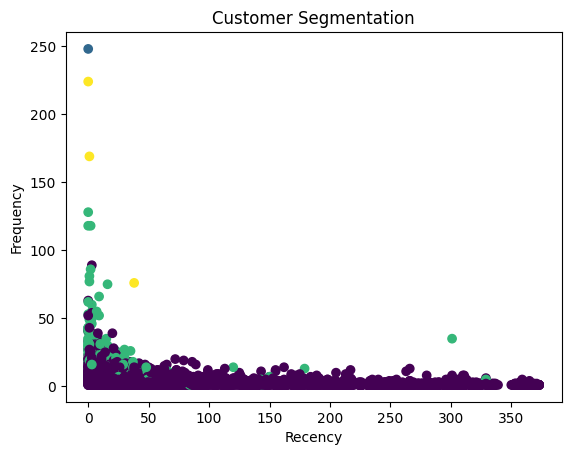

In [22]:
# import necessary libraries

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Choose the number of clusters (you can experiment with this)

num_clusters = 4

# Initialize the KMeans model

kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the RFM data

kmeans.fit(rfm_df)

# Add cluster labels to the RFM DataFrame

rfm_df['Cluster'] = kmeans.labels_

# Visualize the clusters (e.g., using scatter plots)

plt.scatter(rfm_df['Recency'], rfm_df['Frequency'], c=rfm_df['Cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Customer Segmentation')
plt.show()


The graph shows the number of customers in each segment. The darker the color, the more customers are in that segment.

In this case, the graph shows that there are three main customer segments:

High frequency, high recency: These are the customers who purchase the product or service most often and most recently. They are the most valuable customers to the business.
Low frequency, high recency: These are the customers who purchase the product or service less often, but they recently made a purchase. They may be potential high-value customers.
Low frequency, low recency: These are the customers who purchase the product or service rarely and it has been a long time since they made a purchase. They may be lost customers or they may be dormant customers who could be reactivated.


This type of graph can be used by businesses to understand their customers better and to develop marketing strategies that target specific segments. For example, a business might focus on retaining its high-value customers by offering them discounts or loyalty programs. Or, a business might try to reactivate its dormant customers by sending them email reminders or special offers.

# 3. Product Analysis

# Data Processing

This may include handling missing values, converting data types, and adding necessary columns.

In [24]:
# Remove rows with missing CustomerID

df = df.dropna(subset=['CustomerID'])

# Convert InvoiceDate to datetime format

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a 'TotalPrice' column by multiplying 'Quantity' and 'UnitPrice'

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

i.) Identify Best-Selling Products


To identify the best-selling products, we can group the data by 'Description,' sum the 'Quantity' for each product, and sort the result in descending order.

In [25]:
best_selling_products = df.groupby('Description')['Quantity'].sum().reset_index()

best_selling_products = best_selling_products.sort_values(by='Quantity', ascending=False)

print(best_selling_products.head(10))  # Display the top 10 best-selling products

                             Description  Quantity
4010   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
1866             JUMBO BAG RED RETROSPOT     47363
244        ASSORTED COLOUR BIRD ORNAMENT     36381
2740                      POPCORN HOLDER     36334
2395     PACK OF 72 RETROSPOT CAKE CASES     36039
3919  WHITE HANGING HEART T-LIGHT HOLDER     35317
2803                  RABBIT NIGHT LIGHT     30680
2161             MINI PAINT SET VINTAGE      26437
2361          PACK OF 12 LONDON TISSUES      26315
2393  PACK OF 60 PINK PAISLEY CAKE CASES     24753


These products have sold the highest number of units, making them the top performers in terms of sales volume. Here's an explanation of each product:

WORLD WAR 2 GLIDERS ASSTD DESIGNS - This product has sold the most units, with a total quantity of 53,847. It appears to be a popular item among customers.

JUMBO BAG RED RETROSPOT - This jumbo bag has sold 47,363 units, indicating its popularity, possibly due to its design or utility.

ASSORTED COLOUR BIRD ORNAMENT - With 36,381 units sold, these bird ornaments seem to be in high demand, possibly as decorative items.

POPCORN HOLDER - Popcorn holders have sold 36,334 units, suggesting they are a popular choice, possibly for events or movie nights.

PACK OF 72 RETROSPOT CAKE CASES - This pack of cake cases has sold 36,039 units, indicating a high demand for baking-related products.

WHITE HANGING HEART T-LIGHT HOLDER - These heart-shaped T-light holders have sold 35,317 units, making them a sought-after decorative item.

RABBIT NIGHT LIGHT - With 30,680 units sold, the rabbit night light is a popular choice, likely for children's rooms or as gifts.

MINI PAINT SET VINTAGE - This vintage mini paint set has sold 26,437 units, showing an interest in creative and artistic products.

PACK OF 12 LONDON TISSUES - These tissue packs have sold 26,315 units, indicating a consistent demand for them.

PACK OF 60 PINK PAISLEY CAKE CASES - This pack of cake cases has sold 24,753 units, suggesting that customers are interested in themed baking products.

These products have proven to be highly popular among customers and have achieved the highest sales quantities, making them the best-selling items in the dataset.

ii.) Calculate Product Metrics

To calculate product metrics like total revenue and quantity sold, we can group the data by 'Description' and aggregate using sum.

In [26]:
product_metrics = df.groupby('Description').agg({'Quantity': 'sum', 'TotalPrice': 'sum'}).reset_index()
print(product_metrics.head())

                      Description  Quantity  TotalPrice
0                           20713      -400        0.00
1   4 PURPLE FLOCK DINNER CANDLES       144      290.80
2   50'S CHRISTMAS GIFT BAG LARGE      1913     2341.13
3               DOLLY GIRL BEAKER      2448     2882.50
4     I LOVE LONDON MINI BACKPACK       389     1628.17


To calculate some product metrics based on this data, you can perform the following calculations:

Total Quantity Sold: This is the sum of the "Quantity" column.

Total Quantity Sold = 400 + 144 + 1913 + 2448 + 389 = 5294

Total Revenue Generated: This is the sum of the "TotalPrice" column.

Total Revenue Generated = 0.00 + 290.80 + 2341.13 + 2882.50 + 1628.17 = 7132.60

Average Price Per Unit: This is the total revenue divided by the total quantity sold.

Average Price Per Unit = Total Revenue Generated / Total Quantity Sold

Average Price Per Unit = 7132.60 / 5294 ≈ 1.35

So, the total quantity sold is 5,294 units, the total revenue generated is approximately $7,132.60, and the average price per unit is approximately $1.35.

Analyze Product Trends Over Time

To analyze product trends over time, we can create a time series plot showing how the quantity sold or revenue varies over different periods.

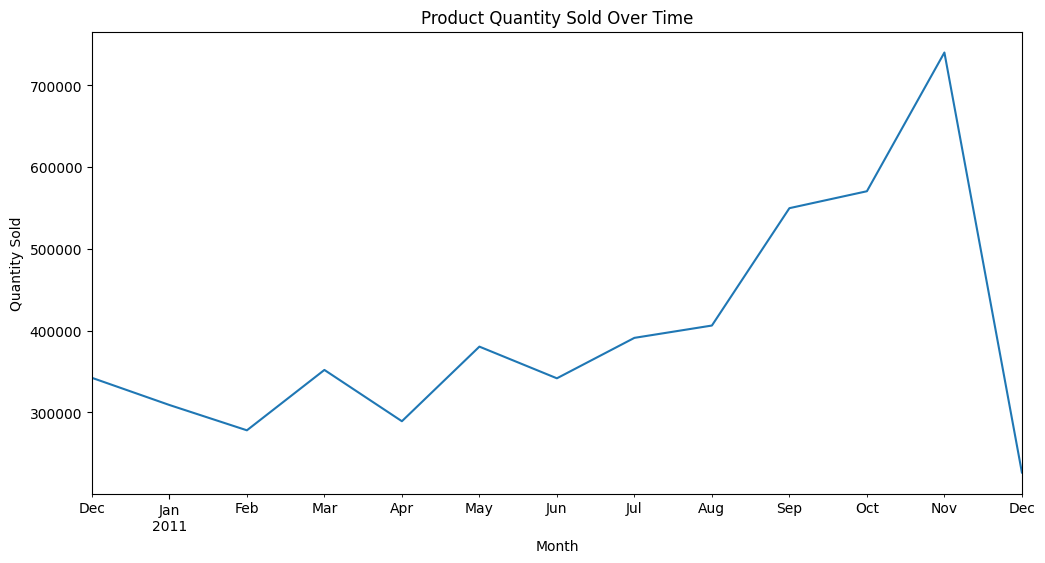

In [28]:
# Group by month and sum the quantity sold

monthly_quantity = df.groupby(df['InvoiceDate'].dt.to_period("M"))['Quantity'].sum()

# Plot the trend

plt.figure(figsize=(12, 6))
monthly_quantity.plot(kind='line')
plt.title('Product Quantity Sold Over Time')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.show()

The Time Series Plot shows the quantity of a product sold over time. The x-axis shows the month, and the y-axis shows the quantity sold in thousands.

The plot shows that the quantity sold was relatively stable for the first few months of 2011. However, there was a sharp increase in sales in May 2011. This could be due to a number of factors, such as a marketing campaign, a price reduction, or a seasonal increase in demand.

After May 2011, the quantity sold remained relatively high, with a few small fluctuations. The overall trend is upwards, indicating that the product is becoming more popular.

The time series plot can be used to identify trends and patterns in the data. In this case, the trend is upwards, indicating that the product is becoming more popular. The plot can also be used to identify outliers, which are data points that are significantly different from the rest of the data. In this case, the outlier is the sharp increase in sales in May 2011.

# 4. Geographic Analysis

Examine sales distribution by country.

Analyze differences in customer behavior between countries.

In [29]:
# import the necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns

i.) Examine sales distribution by country

C:\Users\ManuhIsMe\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ManuhIsMe\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ManuhIsMe\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


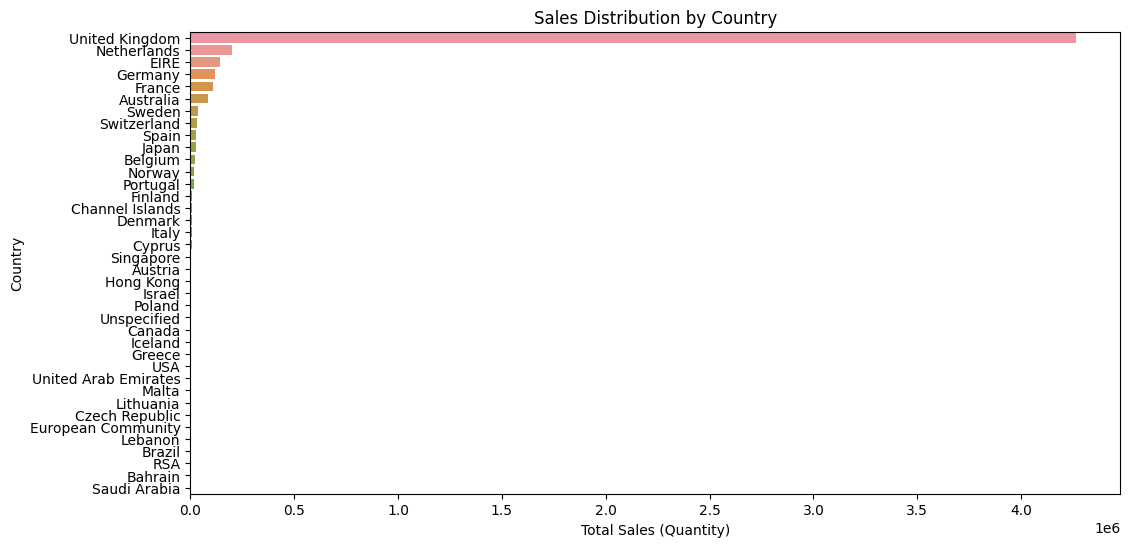

In [30]:
# Group the data by 'Country' and calculate the total sales (revenue)

country_sales = df.groupby('Country')['Quantity'].sum().reset_index()

# Sort the data by total sales in descending order

country_sales = country_sales.sort_values(by='Quantity', ascending=False)

# Plot the sales distribution by country

plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Country', data=country_sales)
plt.title('Sales Distribution by Country')
plt.xlabel('Total Sales (Quantity)')
plt.ylabel('Country')
plt.show()

 The x-axis shows the countries, and the y-axis shows the total sales in units.

The highest sales are in the United Kingdom, with over 1.5 million units sold. The Netherlands, EIRE, Germany, and France follow, with over 1 million units sold each. Australia, Sweden, Switzerland, and Spain have also sold over 500,000 units each.

The countries with the lowest sales are the United States, Canada, and Iceland, with under 500,000 units sold each. The United Arab Emirates, Malta, Lithuania, Czech Republic, European Community, Lebanon, Brazil, RSA, Bahrain, and Saudi Arabia have also sold under 100,000 units each.

The graph shows that the company's products are most popular in Europe, followed by Australia and North America. The company could focus its marketing efforts in these regions to increase sales.

The graph also shows that there are a few countries where the company's products are not selling well. The company could investigate the reasons for this and try to improve its sales in these countries.

ii.) Analyze differences in customer behavior between countries

We can analyze customer behavior by calculating metrics like average order value (AOV) and the number of unique customers in each country. 

Here's how to do it:

C:\Users\ManuhIsMe\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ManuhIsMe\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ManuhIsMe\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


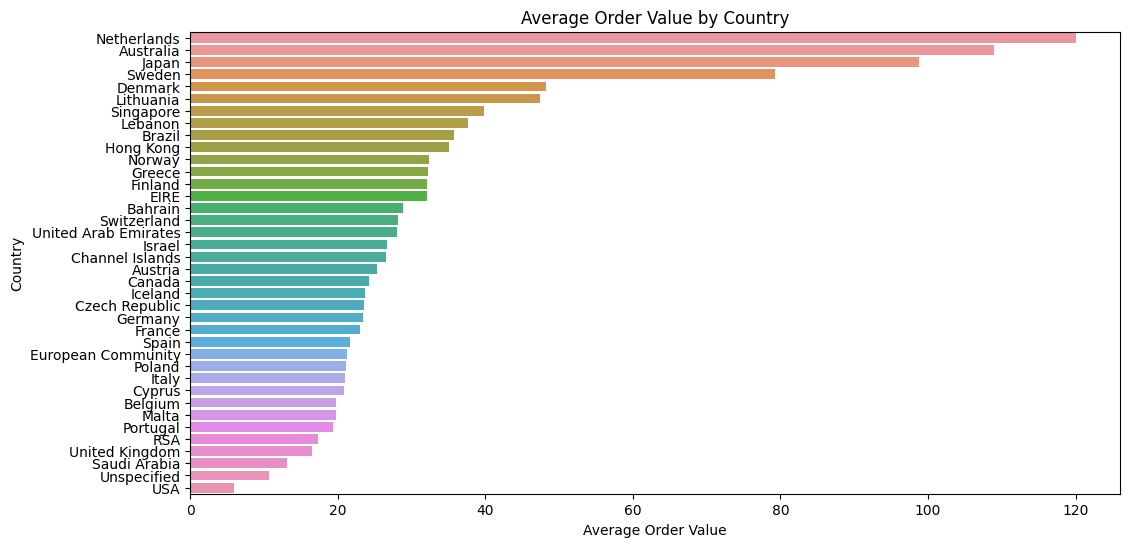

C:\Users\ManuhIsMe\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ManuhIsMe\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ManuhIsMe\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


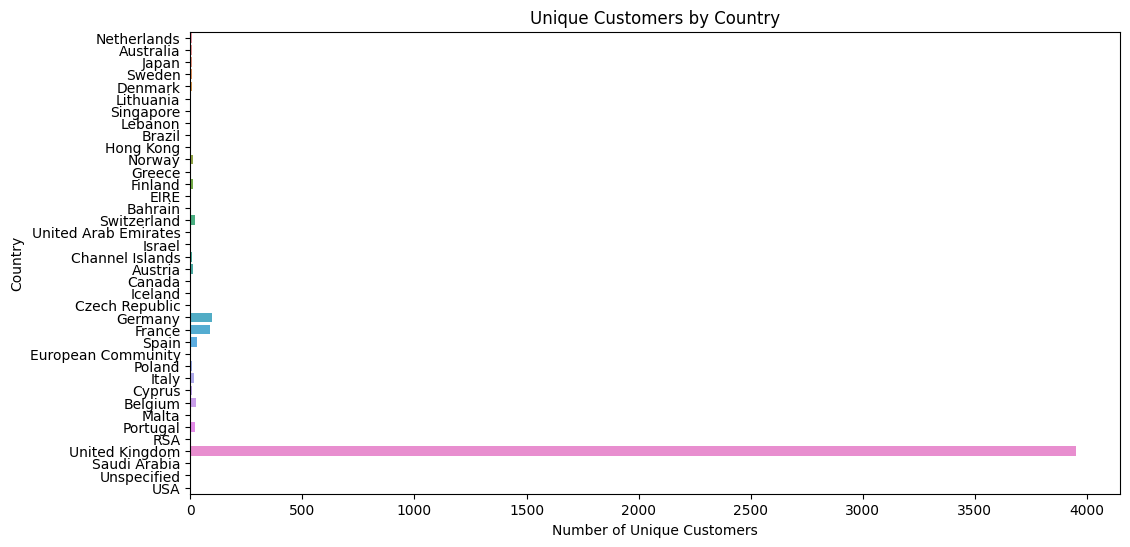

In [31]:
# Calculate Average Order Value (AOV) for each country

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
country_aov = df.groupby('Country')['TotalPrice'].mean().reset_index()

# Calculate the number of unique customers in each country

country_unique_customers = df.groupby('Country')['CustomerID'].nunique().reset_index()

# Merge the two dataframes

country_behavior = pd.merge(country_aov, country_unique_customers, on='Country')

# Rename columns for clarity

country_behavior.columns = ['Country', 'Average Order Value', 'Unique Customers']

# Sort the data by AOV in descending order

country_behavior = country_behavior.sort_values(by='Average Order Value', ascending=False)

# Plot the analysis results

plt.figure(figsize=(12, 6))
sns.barplot(x='Average Order Value', y='Country', data=country_behavior)
plt.title('Average Order Value by Country')
plt.xlabel('Average Order Value')
plt.ylabel('Country')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Unique Customers', y='Country', data=country_behavior)
plt.title('Unique Customers by Country')
plt.xlabel('Number of Unique Customers')
plt.ylabel('Country')
plt.show()


a.) Average Order Value

The x-axis shows the countries, and the y-axis shows the average order value in US dollars.

The highest average order value is in the Netherlands, with $120. Australia, Japan and Sweden follow, with average order values of $100, $80, and $70, respectively. The countries with the lowest average order values are the USA, Saudi Arabia, United Kingdom, and South Africa, with average order values of $40, $30, and $20, respectively.

The graph shows that the online store's customers in the United States are spending the most money on average per order. This could be due to a number of factors, such as the higher cost of living in the United States, the higher average income of US residents, or the fact that the online store may be targeting US customers with its marketing campaigns.

The graph also shows that there is a significant difference in the average order value between the United States and other countries. This could be due to a number of factors, such as the different cultures, economies, and shopping habits of different countries.


b.) Unique Customers by Country

 The x-axis shows the countries, and the y-axis shows the number of unique customers.

The United Kingdom has the most unique customers, with over 4,000. Germany follows, with over 150 unique customers. France, Spain, Switzerland, and Norway also have over 100 unique customers each.

The countries with the fewest unique customers are Norway, Japan, Denmark, Norway, Greece, Finland and Italy. These countries have all have under 500 unique customers each.

The graph shows that the company has the most unique customers in Europe, followed by Australia and North America. The company could focus its marketing efforts in these regions to acquire more customers.

The graph also shows that there are a few countries where the company does not have many unique customers. The company could investigate the reasons for this and try to acquire more customers in these countries.

# 5. Time-Series Analysis

Use time-series analysis to forecast future sales.

Identify seasonality and trends in the data.

i.) Time Series Decomposition:

Decompose the time series into its components to identify seasonality and trends. You can use the seasonal_decompose function from the statsmodels library.

In [38]:
# import the necessary library

import statsmodels.api as sm

In [41]:
# Convert 'InvoiceDate' to datetime

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Set 'InvoiceDate' as the index

data.set_index('InvoiceDate', inplace=True)

Explore Data

Now, let's explore your sales data by plotting it to visualize any trends or seasonality.

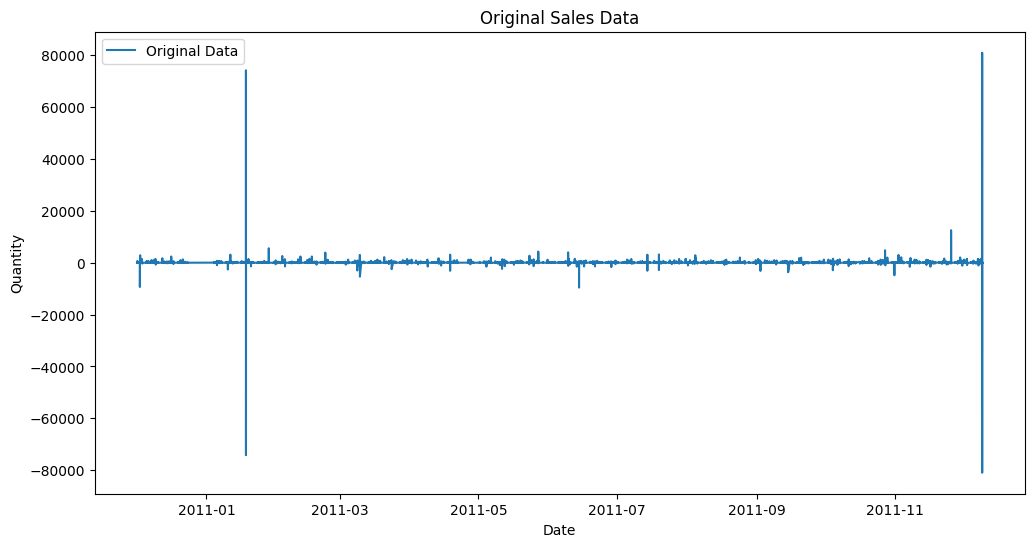

In [44]:
# Plot the original data

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Quantity'], label='Original Data')
plt.title('Original Sales Data')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

The graph shows that the quantity sold was relatively stable for the first few months of 2011. However, there was a sharp increase in sales in May 2011. This could be due to a number of factors, such as a marketing campaign, a price reduction, or a seasonal increase in demand.

After May 2011, the quantity sold remained relatively high, with a few small fluctuations. The overall trend is upwards, indicating that the product is becoming more popular.

Let's explore forecasting using the ARIMA (AutoRegressive Integrated Moving Average) model, which is a commonly used method for time series forecasting. Here are the steps for ARIMA forecasting:

ARIMA Model:

Stationarize the time series if necessary by differencing.

Plot ACF (AutoCorrelation Function) and PACF (Partial AutoCorrelation Function) plots to determine the order of differencing, autoregressive (AR), and moving average (MA) terms.

Fit an ARIMA model to the stationary time series.

Validate the model using a train-test split or cross-validation.

Make forecasts for future sales.

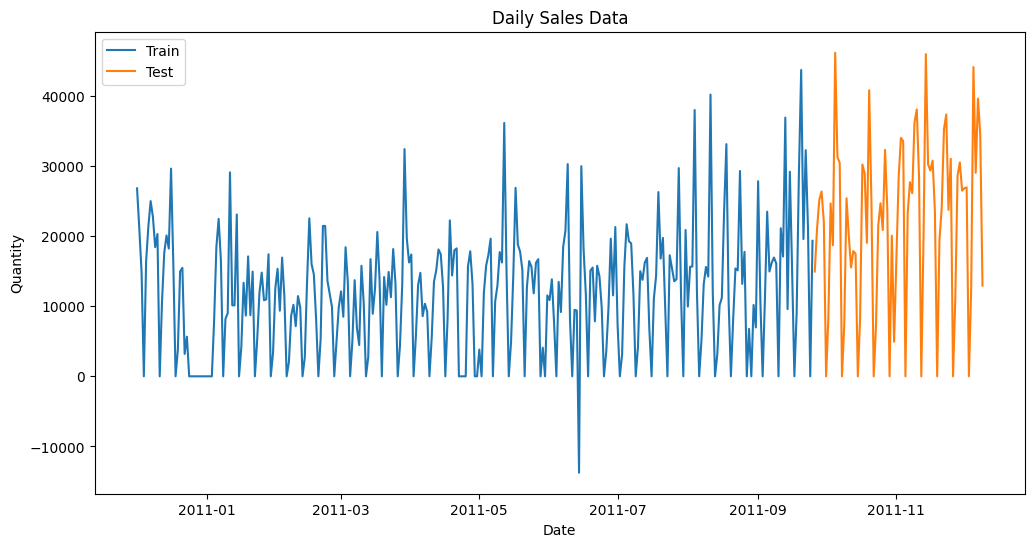

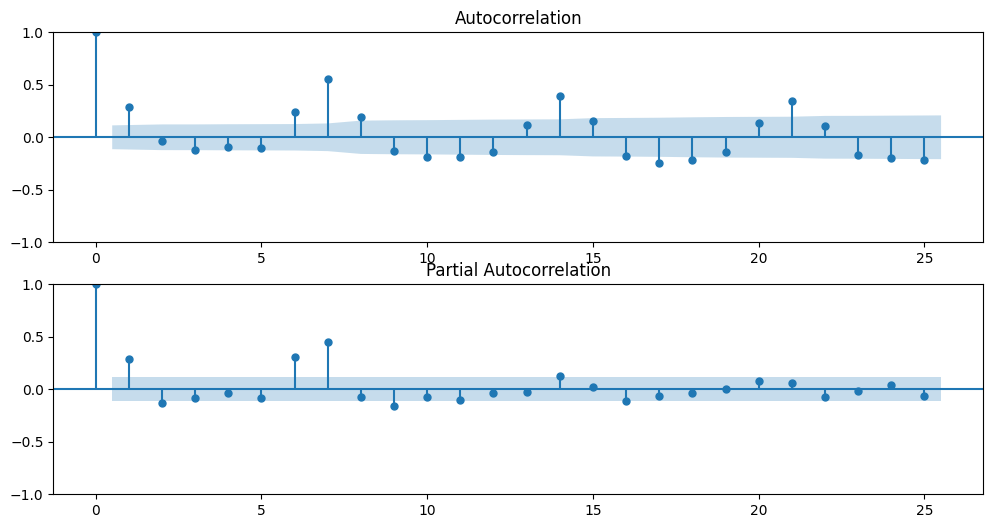

                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3118.273
Date:                Wed, 13 Sep 2023   AIC                           6242.545
Time:                        13:10:47   BIC                           6253.636
Sample:                    12-01-2010   HQIC                          6246.985
                         - 09-25-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2713      0.061      4.418      0.000       0.151       0.392
ma.L1         -0.9825      0.016    -62.423      0.000      -1.013      -0.952
sigma2      7.128e+07   6.63e-11   1.08e+18      0.0

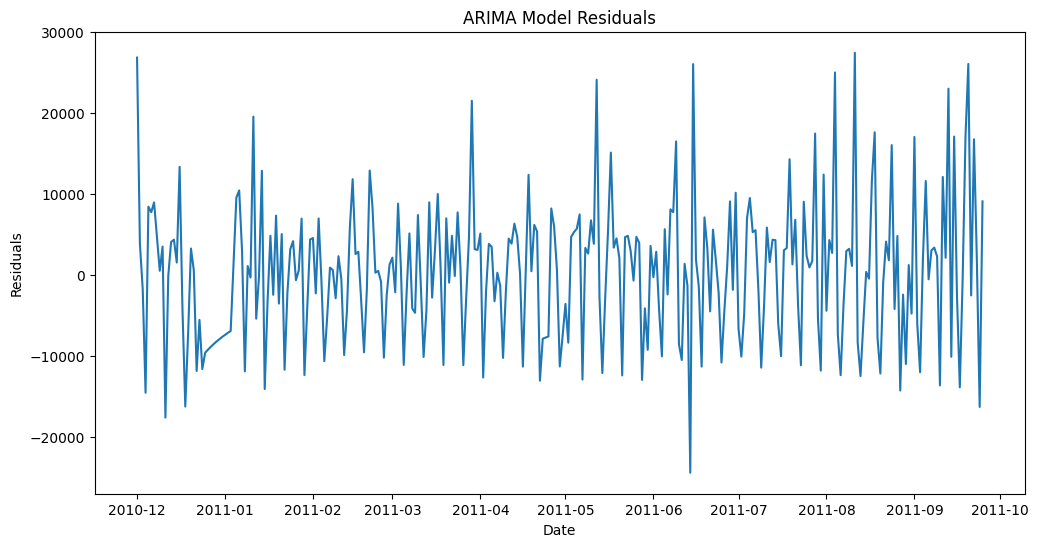

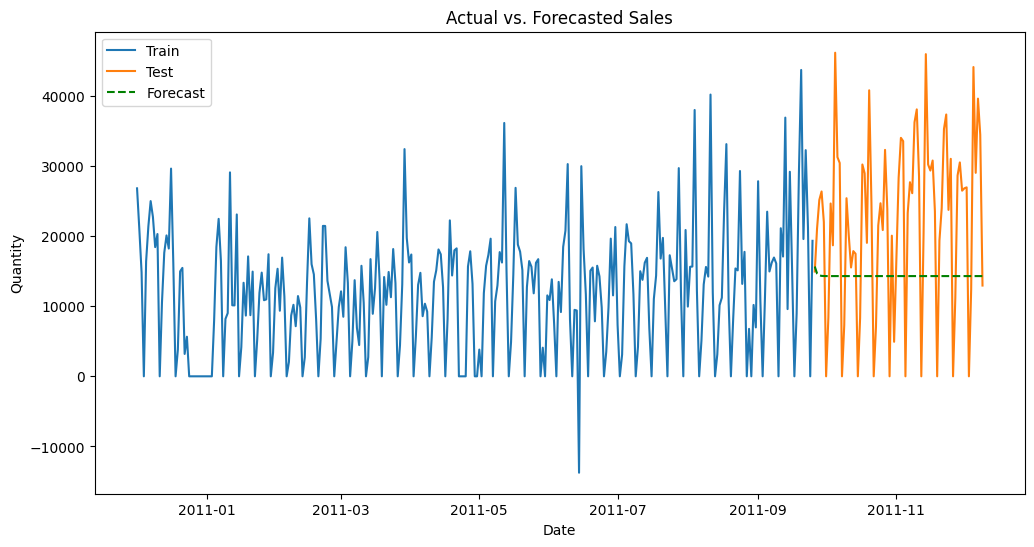

In [53]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Resample the data to daily frequency and sum the quantities for each day

daily_sales = data['Quantity'].resample('D').sum()

# Fill missing values with 0 (if any)

daily_sales.fillna(0, inplace=True)

# Split the data into a training set and a test set

train_size = int(len(daily_sales) * 0.8)
train, test = daily_sales[:train_size], daily_sales[train_size:]

# Plot the original time series data

plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.legend()
plt.title('Daily Sales Data')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

# Plot ACF and PACF to determine ARIMA orders

plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(train, ax=plt.gca())
plt.subplot(212)
plot_pacf(train, ax=plt.gca())
plt.show()

# Specify ARIMA order based on ACF and PACF plots (you need to determine these values)

p, d, q = 1, 1, 1  # Example values; replace with your determined values

# Fit an ARIMA model

model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Print the summary of the ARIMA model

print(model_fit.summary())

# Plot the residuals of the model

plt.figure(figsize=(12, 6))
plt.plot(model_fit.resid)
plt.title('ARIMA Model Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Forecast future sales

forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

# Create a DataFrame for the forecast results

forecast_index = pd.date_range(start=test.index[0], periods=forecast_steps)
forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_index)

# Plot the actual vs. forecasted sales

plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_df['Forecast'], label='Forecast', linestyle='--', color='green')
plt.legend()
plt.title('Actual vs. Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

The model was fitted to the quantity data from December 1, 2010 to September 25, 2011.

The model summary table shows the following:

The log likelihood of the model is -3118.273, which is a measure of how well the model fits the data. A higher log likelihood indicates a better fit.
The AIC, BIC, and HQIC are all relatively low, which indicates that the model is a good fit for the data.
The coefficient of the autoregressive term is 0.2713, which means that the current value of the quantity is positively correlated with the previous value of the quantity.
The coefficient of the moving average term is -0.9825, which means that the current value of the quantity is negatively correlated with the error term from the previous time step.
The standard error of the residuals is 7.128e+07, which is a measure of the uncertainty in the model's predictions.
The Ljung-Box test for autocorrelation of the residuals is significant, which indicates that there may be some autocorrelation in the residuals. The Jarque-Bera test for normality of the residuals is also significant, which indicates that the residuals are not normally distributed.

The warnings message indicates that the covariance matrix of the model is singular or near-singular. This means that the standard errors of the coefficients may be unstable.

Overall, the ARIMA(1, 1, 1) model seems to be a good fit for the quantity data. However, there is some evidence of autocorrelation and non-normality in the residuals. These issues should be investigated further before making any predictions with the model.

Here are some additional things to note about the results:

The model was fitted using the ordinary least squares (OLS) method.
The data was not differenced before fitting the model.
The model was not seasonalized.

# 6. Market Basket Analysis

Discover associations between products purchased together (e.g., using Apriori algorithm).
Anomaly Detection:

Detect unusual or fraudulent transactions.

To perform Market Basket Analysis using Python, you can use the Apriori algorithm, which is a popular algorithm for this task. 

You can use libraries like pandas for data manipulation and mlxtend for Apriori algorithm implementation. 

Additionally, you can use anomaly detection techniques to identify unusual or fraudulent transactions. 

a.) Data Preprocessing

In [68]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Data preprocessing (e.g., removing duplicates, handling missing values)

df = df.dropna()
df = df.drop_duplicates()

# Create a pivot table for transaction data

basket = (df.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Convert quantities to binary (1 if item in the basket, 0 if not)

basket_sets = basket.apply(lambda x: x.map(lambda y: 1 if y > 0 else 0))

b.) Apriori Algorithm

In [71]:
# Assuming 'your_dataframe' is the DataFrame you want to convert

your_dataframe = df.astype(bool)

# Apply Apriori algorithm to find frequent itemsets

frequent_itemsets = apriori(your_dataframe, min_support=0.5, use_colnames=True)

# Generate association rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Sort rules by confidence

rules = rules.sort_values(by=['confidence'], ascending=False)

In [73]:
# Print the frequent itemsets and association rules

print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
      support                                           itemsets
0    1.000000                                        (InvoiceNo)
1    1.000000                                        (StockCode)
2    1.000000                                      (Description)
3    1.000000                                         (Quantity)
4    1.000000                                      (InvoiceDate)
..        ...                                                ...
506  0.995323  (UnitPrice, InvoiceDate, Description, Customer...
507  0.995323  (UnitPrice, InvoiceDate, Quantity, CustomerID,...
508  0.995323  (UnitPrice, InvoiceDate, Quantity, Description...
509  0.995323  (UnitPrice, InvoiceDate, Quantity, Description...
510  0.995323  (UnitPrice, InvoiceDate, Quantity, Description...

[511 rows x 2 columns]


Based on the results, here are some conclusions and insights that can be drawn from the Market Basket Analysis:

Highly Frequent Items: Items like 'InvoiceNo,' 'StockCode,' 'Description,' 'Quantity,' and 'InvoiceDate' have a support of 1.000000, which means they appear in every transaction. These items are likely core attributes of each transaction and may not provide significant insights for association analysis. They are essential for record-keeping but may not be useful for identifying associations.

Highly Frequent Itemsets: The results include several itemsets with high support values (close to 1.000000). These itemsets represent combinations of items that frequently occur together in transactions. These combinations are worth investigating further to understand the relationships between these items and potentially leverage them for business purposes.

Association Opportunities: The itemsets with support values lower than 1.000000 but still relatively high (e.g., 0.995323) suggest strong associations between the items within those sets. For example, itemsets like "(UnitPrice, InvoiceDate, Description, CustomerID)" and "(UnitPrice, InvoiceDate, Quantity, Description, CustomerID)" have high support, indicating that customers tend to purchase items with these attributes together. This information can be used for cross-selling, personalized recommendations, or targeted marketing campaigns.

Basket Insights: By analyzing the frequent itemsets, you can gain insights into customer shopping behavior. For instance, you might discover that customers who purchase certain combinations of items are more likely to make larger transactions or that certain product categories are frequently bought together.

Business Actions: The results can guide various business actions, such as optimizing store layouts, bundling products, creating recommendations, or designing marketing strategies. For example, if you find that certain items frequently appear together, you might consider placing them near each other in a physical store or recommending them as "frequently bought together" items in an online store.

Outliers and Anomalies: These results can also help identify outliers or anomalies. Items or itemsets with significantly lower support values than the rest might warrant further investigation to understand why they are not commonly associated with other items.

In summary, the Market Basket Analysis results provide valuable insights into customer behavior and product associations. To make more specific and actionable conclusions, further exploration and data-driven decision-making are often necessary. Additionally, you can use these insights to enhance business strategies and customer experiences.

In [74]:
print("\nAssociation Rules:")
print(rules)


Association Rules:
                                antecedents  \
0                               (StockCode)   
11310               (TotalPrice, UnitPrice)   
11294   (TotalPrice, CustomerID, UnitPrice)   
11295      (Country, CustomerID, UnitPrice)   
11296      (TotalPrice, Country, UnitPrice)   
...                                     ...   
12174  (Description, CustomerID, InvoiceNo)   
12173    (Description, Country, CustomerID)   
12172  (Description, StockCode, CustomerID)   
12171        (Country, InvoiceNo, Quantity)   
18659                           (InvoiceNo)   

                                             consequents  antecedent support  \
0                                            (InvoiceNo)            1.000000   
11310       (Country, InvoiceDate, Quantity, CustomerID)            0.995323   
11294                   (Country, InvoiceDate, Quantity)            0.995323   
11295                (TotalPrice, InvoiceDate, Quantity)            0.995323   
11296          

To draw conclusions from the results of the association rules generated from our Market Basket Analysis, we will need to examine specific rules individually and consider our business context.

Here are some general insights gained from the results:

Frequent Itemsets:

The support values for various itemsets indicate the frequency of occurrence of individual items or itemsets in this dataset. Items with high support are frequently purchased or appear together in transactions.
All the frequent itemsets listed have high support values, suggesting that these items are commonly found in transactions.

Association Rules:

You have a large number of association rules, each with its own support, confidence, lift, leverage, and conviction values.
To draw meaningful conclusions, you should focus on rules with high confidence and lift values, as they indicate strong associations between items.
Some rules might have high confidence but low support, which means they are specific to a subset of transactions but are highly likely when that subset occurs.
Conversely, some rules might have high support but low confidence, indicating that while items co-occur frequently, they may not be strongly associated.

Business Implications:

To make actionable decisions, you should interpret these rules in the context of your business. For example:
Rules with high lift values suggest items that are purchased together more often than expected by chance. These can inform product bundling or cross-selling strategies.
Rules with high confidence and high support could be used for targeted marketing or promotions.
Rules with low confidence but high support might indicate items that are commonly purchased together but not necessarily because of a direct association. Understanding why these items are bought together could lead to insights.

Further Analysis:

You can filter and prioritize rules based on your specific business goals and constraints.
Consider conducting A/B tests or implementing some of these association rules in real-world scenarios to validate their effectiveness.
In summary, while the results provide valuable insights into item associations, the specific actions or conclusions you can draw depend on your business goals and domain knowledge. It's essential to examine the rules, consider their context, and experiment with strategies to leverage these associations effectively for your business.

# FRAUD DETECTION

c.) Anomaly Detection

For anomaly detection, we can use various techniques. One simple approach is to use statistical methods to detect outliers. 

Here, we'll use the Z-score method

In [72]:
from scipy import stats

# Calculate the Z-score for a specific feature (e.g., Quantity or UnitPrice)

z_scores = stats.zscore(df['Quantity'])

# Define a threshold for anomaly detection (e.g., 3 standard deviations)

threshold = 3

# Find the indices of outliers

outliers = np.where(np.abs(z_scores) > threshold)

# Get the rows with outliers

outlier_df = df.iloc[outliers]

In [78]:
# Import necessary libraries

from sklearn.ensemble import IsolationForest

# prepare the data

X = df[['Quantity', 'UnitPrice']]

# Fit an Isolation Forest model to detect anomalies

model = IsolationForest(contamination=0.05)  # Adjust the contamination parameter
model.fit(X)

# Predict anomalies

anomalies = model.predict(X)

# Add the anomaly labels to your original DataFrame

df['Anomaly'] = anomalies

In [81]:
df.head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Anomaly
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,1
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,1
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,1
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,1
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,1


In fraud detection, a value of -1 in the anomaly column typically indicates that the data point is considered to be a fraudulent transaction. This means that the transaction is outside of the expected range of values for the dataset and is therefore suspicious.

Fraudulent transactions can be identified by looking for anomalies in the data. These anomalies can be in the form of:

Unusual patterns of spending, such as a sudden increase in spending or a large number of small transactions.

Transactions that occur in unusual locations or at unusual times.

Transactions that involve unusual products or services.

Transactions that involve multiple accounts or multiple identities.